<a href="https://colab.research.google.com/github/Hyewon0920/simple-machine-learning-project/blob/main/SGD_%EC%98%88%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

In [ ]:
california = fetch_california_housing()

df = pd.DataFrame(california.data, columns = california.feature_names)
df["TARGET"] = california.target
df.shape

(20640, 9)

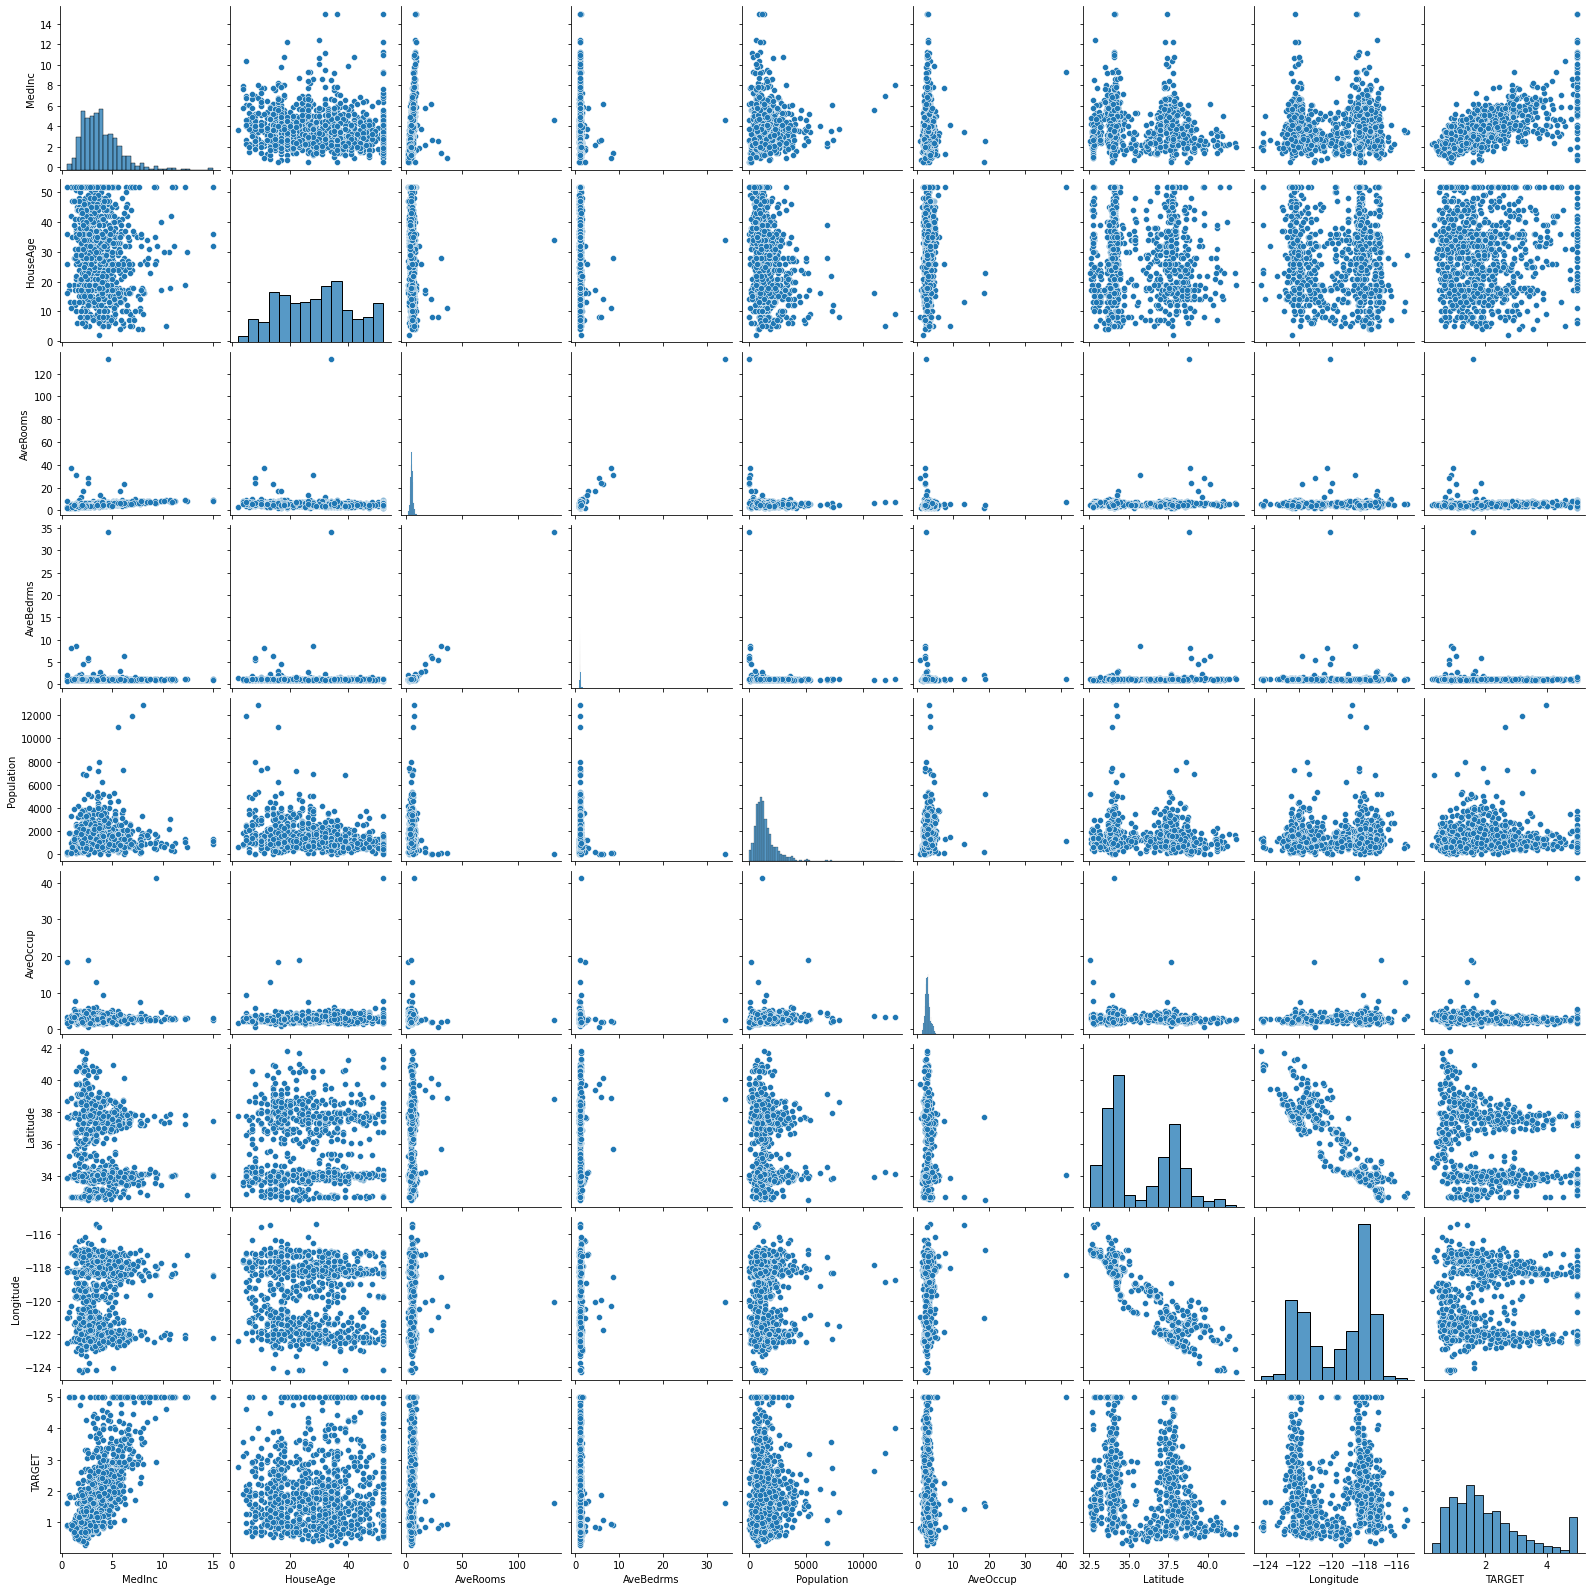

In [ ]:
sns.pairplot(df.sample(1000))
plt. show()

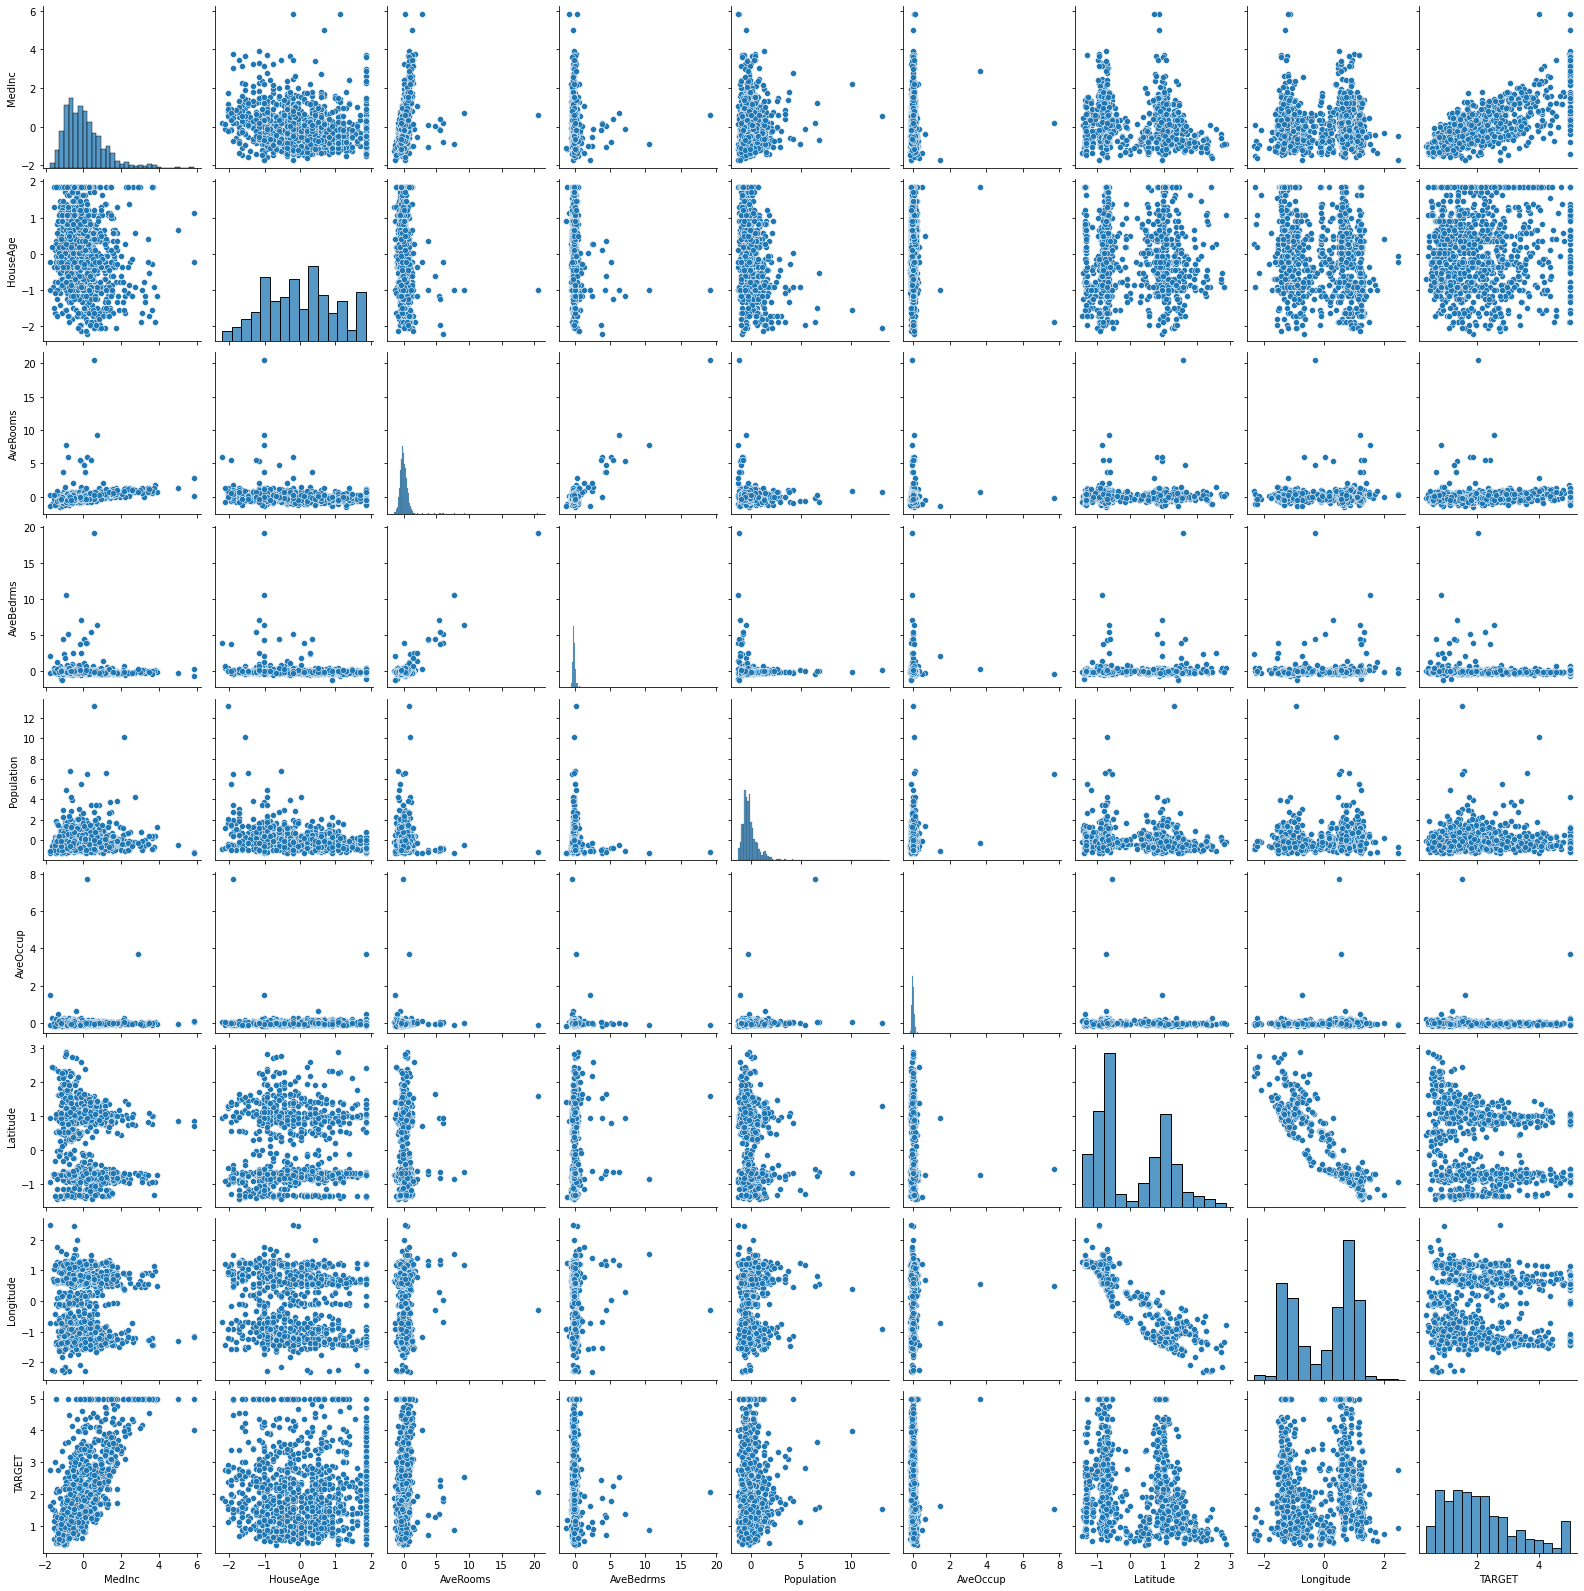

In [ ]:
scaler = StandardScaler()
scaler.fit(df.values[:,:-1])
df.values[:,:-1] = scaler.transform(df.values[:,:-1])

sns.pairplot(df.sample(1000))
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

data = torch.from_numpy(df.values).float()

print(data.shape)

torch.Size([20640, 9])


In [ ]:
x = data[:,:-1]
y = data[:,-1:]

print(x.shape, y.shape)

torch.Size([20640, 8]) torch.Size([20640, 1])


In [ ]:
n_epochs = 4000
learning_rate = 1e-2
batch_size = 256
print_interval = 200

model = nn.Sequential(
    nn.Linear(x.size(-1), 6),
    nn.LeakyReLU(),
    nn.Linear(6,5),
    nn.LeakyReLU(),
    nn.Linear(5,4),
    nn.LeakyReLU(),
    nn.Linear(4,3),
    nn.LeakyReLU(),
    nn.Linear(3, y.size(-1)),
)

optimizer = optim.SGD(model.parameters(), lr = learning_rate)

for i in range(n_epochs) : 
  indices = torch.randperm(x.size(0))
  x_ = torch.index_select(x, dim=0, index= indices)
  y_ = torch.index_select(y, dim=0, index = indices)
  x_ = x_.split(batch_size, dim=0)
  y_ = y_.split(batch_size, dim=0)
  
  y_hat = []
  total_loss = 0
  
  for x_i, y_i in zip(x_,y_) :
    y_hat_i = model(x_i)
    loss = F.mse_loss(y_hat_i, y_i)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    total_loss += float(loss)

    y_hat += [y_hat_i]
    total_loss = total_loss / len(x_)

y_hat = torch.cat(y_hat, dim=0)
y = torch.cat(y_, dim = 0)
                                

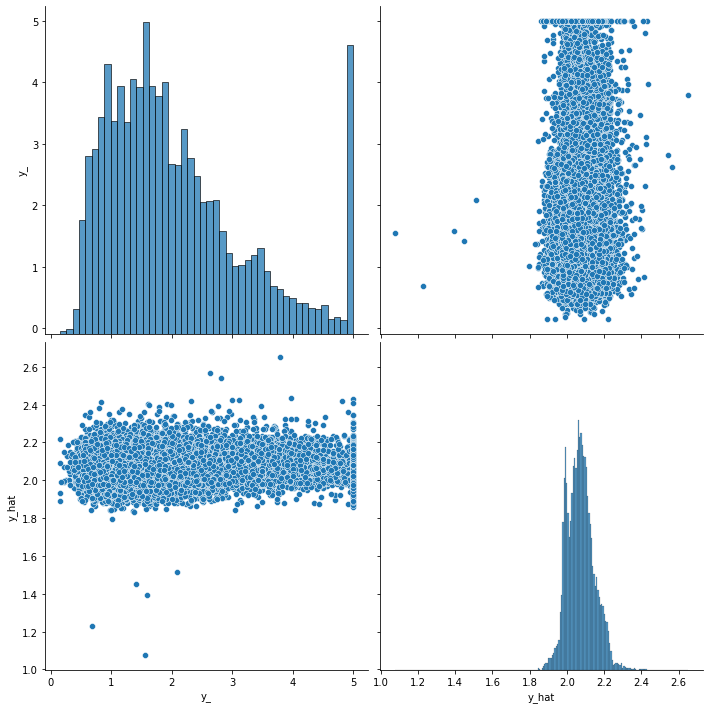

In [ ]:
data = pd.DataFrame(torch.cat([y, y_hat],dim=1).detach().numpy(), columns = ["y_", "y_hat"])

sns.pairplot(data, height =5)
plt.show()